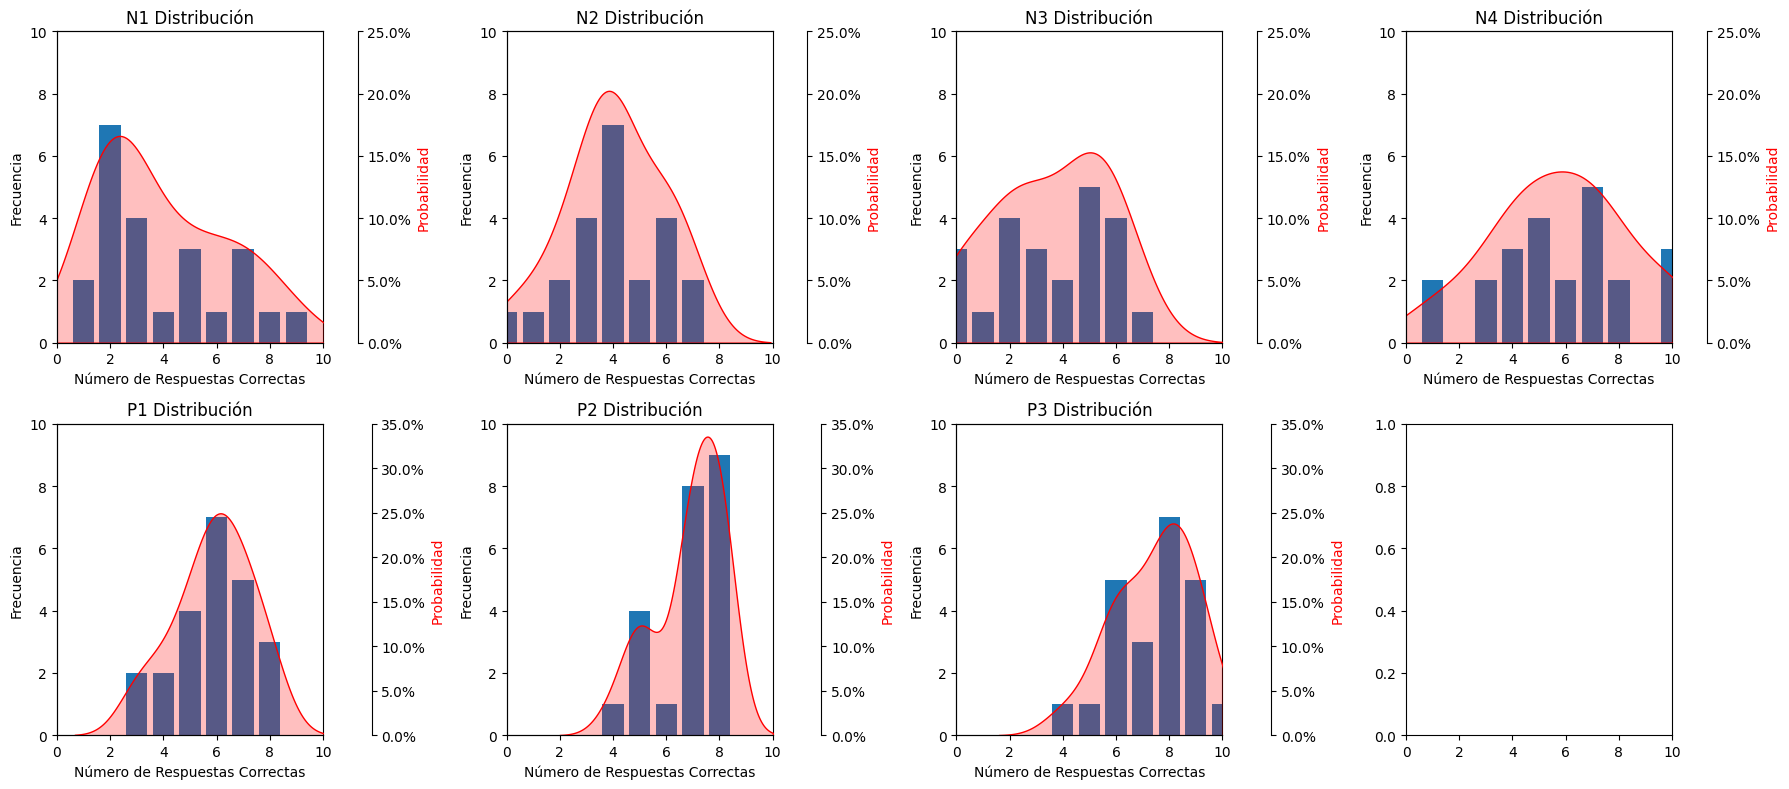

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

# Read the data from the CSV file (replace 'your_file.csv' with the actual file path)
data = pd.read_csv('rawdata.csv', delimiter=';')

# Create subplots to display bar plots for distribution and KDE plots for density
fig, axes = plt.subplots(2, 4, figsize=(18, 8))

# Define the maximum value for the y-axis
max_y = data[['N1', 'N2', 'N3', 'N4', 'P1', 'P2', 'P3']].max().max()

# Plot N1 to N4 distributions and density
for i, col in enumerate(['N1', 'N2', 'N3', 'N4']):
    ax = axes[0, i]
    ax.set_title(f'{col} Distribución')
    ax.set_xlabel('Número de Respuestas Correctas')
    ax.set_ylabel('Frecuencia')
    
    # Calculate the distribution
    distribution = data[col].value_counts().sort_index()
    
    # Fill in missing values with zeros and ensure the x-axis range from 0 to 10
    distribution = distribution.reindex(range(11), fill_value=0)
    
    # Plot the distribution as bars
    ax.bar(distribution.index, distribution.values)
    
    # Set the y-axis limit to the maximum value
    ax.set_ylim(0, max_y)

    # Python
    # Create a KDE plot
    ax2 = ax.twinx()
    sns.kdeplot(data[col], color='red', ax=ax2, fill=True)
    # Format y-axis labels to display as percentages
    ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    # Set the y-axis limit to 25%
    ax2.set_ylim(0, 0.25)
    ax2.spines['right'].set_position(('outward', 25))
    ax2.set_ylabel('Probabilidad', color='red')

# Plot P1 to P3 distributions and density
for i, col in enumerate(['P1', 'P2', 'P3']):
    ax = axes[1, i]
    ax.set_title(f'{col} Distribución')
    ax.set_xlabel('Número de Respuestas Correctas')
    ax.set_ylabel('Frecuencia')
    
    # Calculate the distribution
    distribution = data[col].value_counts().sort_index()
    
    # Fill in missing values with zeros and ensure the x-axis range from 0 to 10
    distribution = distribution.reindex(range(11), fill_value=0)
    
    # Plot the distribution as bars
    ax.bar(distribution.index, distribution.values)
    
    # Set the y-axis limit to the maximum value
    ax.set_ylim(0, max_y)
    
    # Python
    # Create a KDE plot
    ax2 = ax.twinx()
    sns.kdeplot(data[col], color='red', ax=ax2, fill=True)
    # Format y-axis labels to display as percentages
    ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    # Set the y-axis limit to 35%
    ax2.set_ylim(0, 0.35)
    ax2.spines['right'].set_position(('outward', 35))
    ax2.set_ylabel('Probabilidad', color='red')

# Set the x-axis limits to ensure it always displays 0 to 10
for ax in axes.flat:
    ax.set_xlim(0, 10)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


{'name': 'StudentTestResults',
 'file_name': '',
 'dataset_description': 'A dataset containing the test results of students',
 'fields': [{'column': 'StudentId',
   'properties': {'dtype': 'int64',
    'samples': [16, 10, 1],
    'num_unique_values': 23,
    'semantic_type': 'student_id',
    'description': 'The unique identifier of a student'}},
  {'column': 'NumericTestResult1',
   'properties': {'dtype': 'int64',
    'samples': [9, 7, 3],
    'num_unique_values': 9,
    'semantic_type': 'numeric_test_result',
    'description': 'The result of the first numeric test'}},
  {'column': 'NumericTestResult2',
   'properties': {'dtype': 'int64',
    'samples': [3, 0, 6],
    'num_unique_values': 8,
    'semantic_type': 'numeric_test_result',
    'description': 'The result of the second numeric test'}},
  {'column': 'NumericTestResult3',
   'properties': {'dtype': 'int64',
    'samples': [5, 2, 4],
    'num_unique_values': 8,
    'semantic_type': 'numeric_test_result',
    'description': 'T

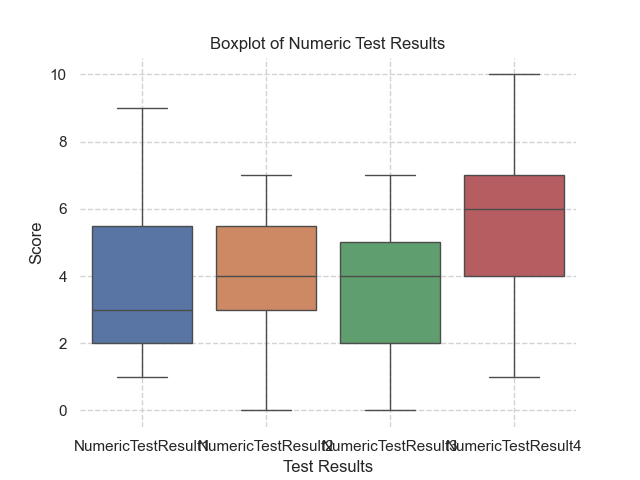

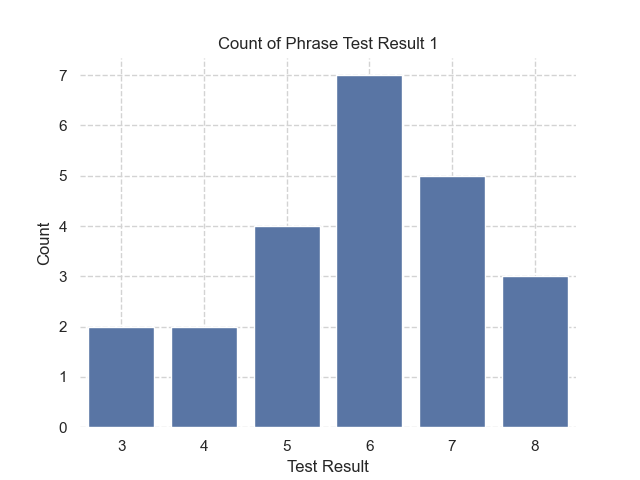

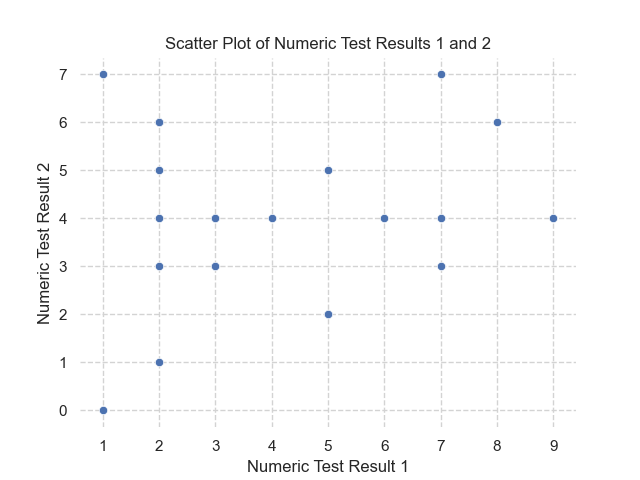


### Goal 0
---
**Question:** How did students perform on the numeric tests?

**Visualization:** `Bar chart of NumericTestResult1, NumericTestResult2, NumericTestResult3, NumericTestResult4`

**Rationale:** By visualizing the results of the numeric tests, we can compare the performance of students across different iterations of the test. A bar chart is suitable for this comparison as it allows us to easily compare the scores for each iteration.



### Goal 1
---
**Question:** How did students perform on the phrase tests?

**Visualization:** `Bar chart of PhraseTestResult1, PhraseTestResult2, PhraseTestResult3`

**Rationale:** By visualizing the results of the phrase tests, we can compare the performance of students across different iterations of the test. A bar chart is suitable for this comparison as it allows us to easily compare the scores for each iteration.



### Goal 2
---
**Question:** How do the numeric and phrase test results correlate?

**Visualization:** `Scatter plot of NumericTestResult1 vs PhraseTestResult1, NumericTestResult2 vs PhraseTestResult2, NumericTestResult3 vs PhraseTestResult3`

**Rationale:** By visualizing the correlation between the numeric and phrase test results, we can determine if there is a relationship between the two types of tests. A scatter plot is suitable for this visualization as it allows us to see the relationship between two numerical variables.


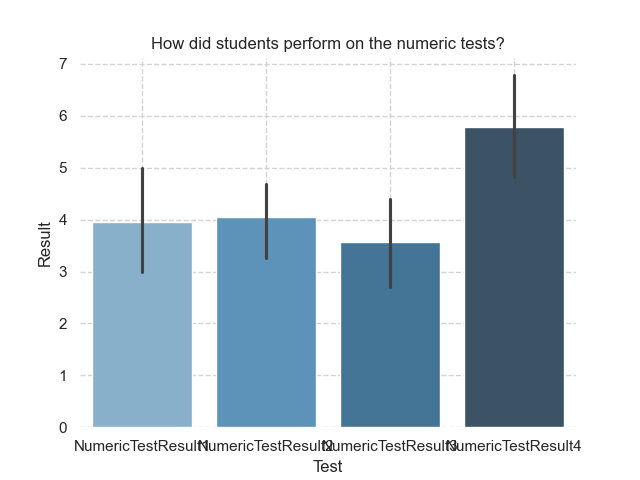

<string>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.



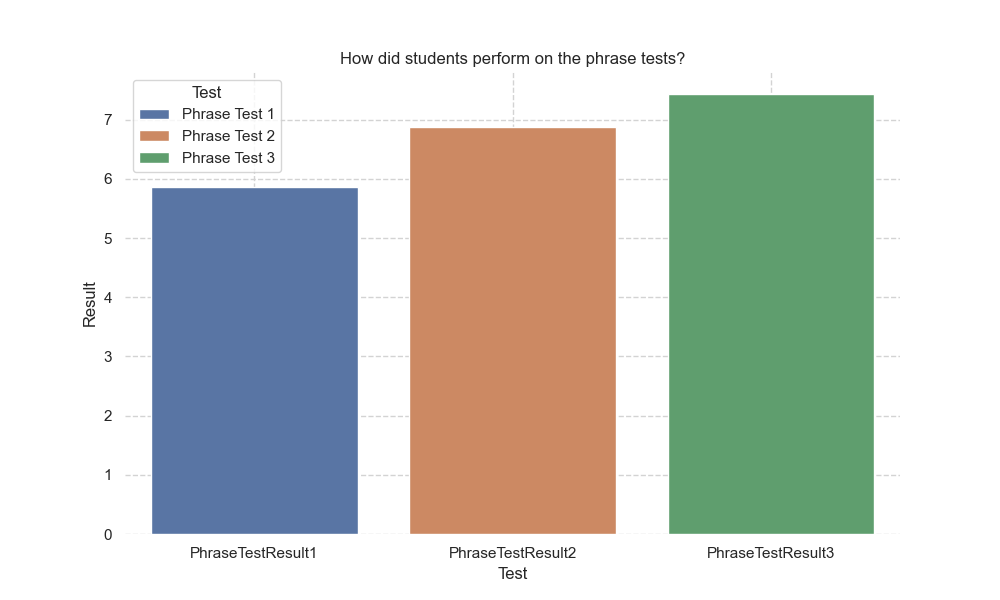

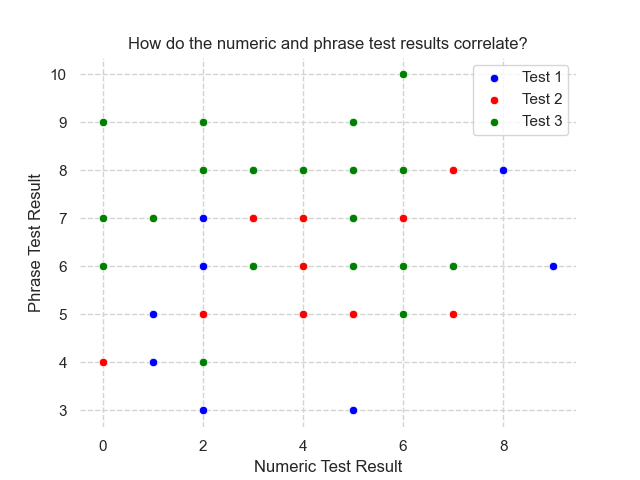

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


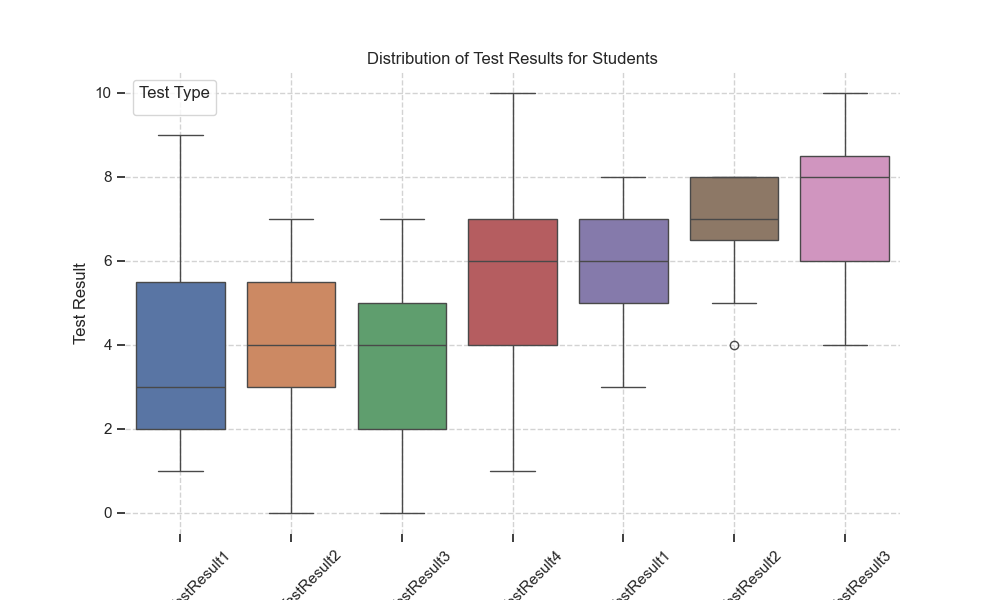

In [5]:
# Read the data from the CSV file (replace 'your_file.csv' with the actual file path)
dataframe_to_analyse = pd.read_csv('rawdata.csv', delimiter=';')

# Import Lida
from lida import llm, Manager, TextGenerationConfig
from dotenv import load_dotenv
import os

# Load environment variables from .env file
load_dotenv()

# Create a Lida instance
openai_gen = llm(provider="openai", api_type="azure",
               api_base=os.environ["OPENAI_API_BASE"],
               api_key=os.environ["OPENAI_API_KEY"],
               api_version=os.environ["OPENAI_API_VERSION"])
lida = Manager(text_gen=openai_gen)

# Configure OpenAI API
openai_config = TextGenerationConfig(n=1, temperature=0.5, model=os.environ["DEPLOYMENT_ID"], max_tokens=50)

# Generate a summary of the data
summary = lida.summarize(dataframe_to_analyse, summary_method="llm", textgen_config=openai_config)
display(summary)

# Given a dataset, recommend visualizations
recommendations = lida.recommend(dataframe_to_analyse, summary=summary, n=3,  textgen_config=openai_config)
for recommendation in recommendations:
    display(recommendation)

# Generate 3 different possible goals from the intent of a persona
persona = f"A primary professor who wants to get insights on how students performed each iteration of 2 tests, numeric and phrases."
personal_goals = lida.goals(summary, n=3, persona=persona, textgen_config=openai_config)
for goal in personal_goals:
    display(goal)

# Visualize the generated goals as charts
for goal in personal_goals:
    charts = lida.visualize(summary=summary, goal=goal, textgen_config=openai_config)
    for chart in charts:
        display(chart)

# Visualize data based on a user query
user_query = "What is the distribution students per each test?"
charts = lida.visualize(summary=summary, goal=user_query, textgen_config=openai_config)
for chart in charts:
    display(chart)
